# Assignment 5 - Phase1

### Amithossein Abaskohi
### STD: 810197539

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import csv
import matplotlib.pyplot as plt
import copy

#### Reading dataset files and Visualizing classes frequencies:

Here we read data using `csv` python module from data files and csv files and save them into a list. As we need these laters but in `np.array` format in passing them to `DataLoader` class we will pass `np.array` of them.

After reading data using `csv` module, we calculate frequency of each class and then plot their bar chart using `matplotlib`.

As you can see in bar charts, classes are repeated equaly. It shows our train data is balanced.

<b>What is the problem of unbalanced classes?</b>

In a classification problem when out of all the classes which you want to predict if for one or more classes there are extremely low number of samples you may be facing a problem of unbalanced classes in your data.

<b>What are the different approaches followed to solve this?</b>

* <b>Undersampling</b>- Randomly delete the class which has sufficient observations so that the comparative ratio of two classes is significant in our data.Although this approach is really simple to follow but there is a high possibility that the data that we are deleting may contain important information about the predictive class.

* <b>Oversampling</b>-For the unbalanced class randomly increase the number of observations which are just copies of existing samples.This ideally gives us sufficient number of samples to play with.The oversampling may lead to overfitting to the training data.

* <b>Synthetic sampling(SMOTE)</b>-The technique asks to synthetically manufacture observations of unbalanced classes which are similar to the existing using nearest neighbors classification.The problem is what to do when the number of observations of is an extremely rare class .For example-we may have only one picture of a rare species which we want to identify using image classification algorithm

Although we do not have unbalanced train data but it was good to mention solutions to solve it.

#### Normalizing data:
Here we used `divide by max` aproach to normalize data. But why we need to normalize data:

Among the best practices for training a Neural Network is to normalize your data to obtain a mean close to 0. Normalizing the data generally speeds up learning and leads to faster convergence. Also, the (logistic) sigmoid function is hardly ever used anymore as an activation function in hidden layers of Neural Networks, because the tanh function (among others) seems to be strictly superior.

One reason why normalization helps should be quite clear: If you have a feature that is all positive or all negative, this will make learning harder for the nodes in the layer that follows. They will have to zigzag. If you transform your data so it has a mean close to zero, you will thereby make sure that there are both positive values and negative ones.

<b>“Zigzagging”</b>: Adding and removing different amounts to the weights until the change in direction is completed. This is highly inefficient. 

The second reason why normalization helps is connected to the scale of the inputs. Normalization ensures that the magnitude of the values that a feature assumes are more or less the same.

Recall that our steps during gradient descent, and therefore the speed of learning in nodes with logistic activation functions, depend on:

![](images/1.png)

where xᵢ is the ith input to the node. The larger xᵢ, the larger the updates and vice versa. The speed of learning is proportional to the magnitude of the inputs.

If the inputs are of different scales, the weights connected to some inputs will be updated much faster than other ones. This generally hurts the learning process — unless we know in advance what features are more important than others, in which case we can adjust the scales to have our neural network focus its learning on the more important ones. But in practice it is quite unlikely that we can predict how this will benefit learning in advance.

In [2]:
trainData = []
with open('Fashion-MNIST/trainData.csv', newline='') as trainFile:
    trainDataReader = csv.reader(trainFile, delimiter=',')
    for row in trainDataReader:
        trainData.append(list(map(int, row)))

In [3]:
testData = []
with open('Fashion-MNIST/testData.csv', newline='') as testFile:
    testDataReader = csv.reader(testFile, delimiter=',')
    for row in testDataReader:
        testData.append(list(map(int, row)))

In [4]:
trainLabels = []
with open('Fashion-MNIST/trainLabels.csv', newline='') as trainFile:
    trainDataReader = csv.reader(trainFile, delimiter=',')
    for row in trainDataReader:
        trainLabels.append(row[0])

In [5]:
testLabels = []
with open('Fashion-MNIST/testLabels.csv', newline='') as testFile:
    testDataReader = csv.reader(testFile, delimiter=',')
    for row in testDataReader:
        testLabels.append(row[0])

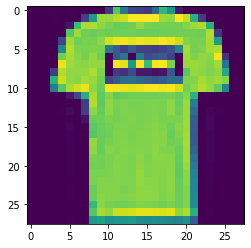

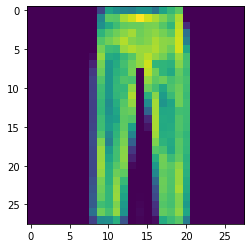

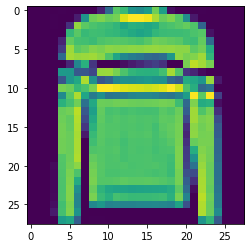

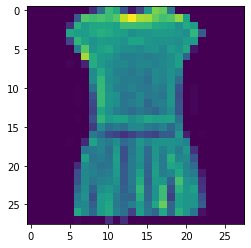

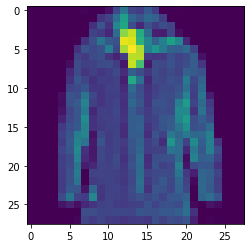

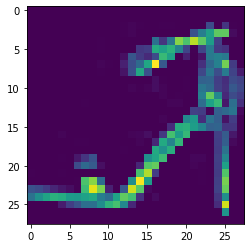

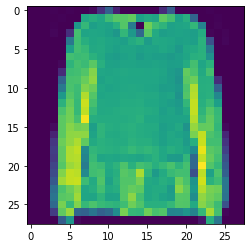

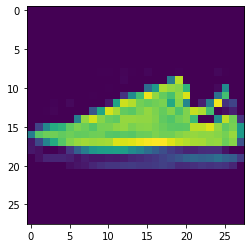

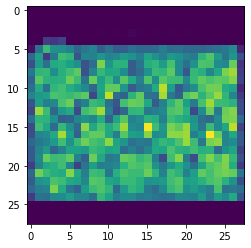

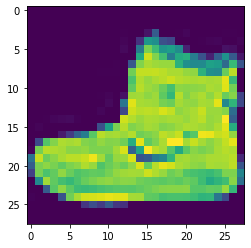

In [11]:
selectedFromClass = [False]*10
indexes = [0]*10
i = 0
for label in trainLabels:
    if selectedFromClass[int(label)] == False:
        selectedFromClass[int(label)] = True
        indexes[int(label)] = i
    if selectedFromClass == [True]*10:
        break
    i += 1
for index in indexes:
    new_array = np.reshape(trainData[index], (28, 28))
    plt.imshow(new_array)
    plt.show()

In [7]:
numberOfClassesInTrain = {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0,
                          '5': 0, '6': 0, '7': 0, '8': 0, '9': 0}
for label in trainLabels:
    numberOfClassesInTrain[label] += 1

In [8]:
numberOfClassesInTest = {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0,
                          '5': 0, '6': 0, '7': 0, '8': 0, '9': 0}
for label in testLabels:
    numberOfClassesInTest[label] += 1

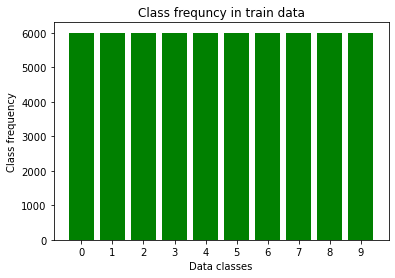

In [9]:
plt.bar(numberOfClassesInTrain.keys(), numberOfClassesInTrain.values(), color='g')
plt.xlabel("Data classes")
plt.ylabel("Class frequency")
plt.title("Class frequncy in train data")
plt.show();

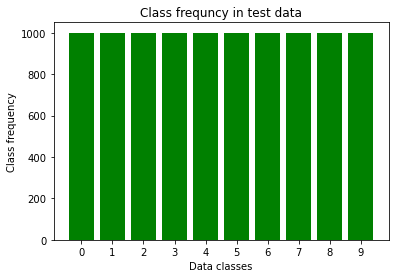

In [10]:
plt.bar(numberOfClassesInTest.keys(), numberOfClassesInTest.values(), color='g')
plt.xlabel("Data classes")
plt.ylabel("Class frequency")
plt.title("Class frequncy in test data")
plt.show();

In [11]:
for i in range(len(trainData)):
    for j in range(len(trainData[i])):
        trainData[i][j] = trainData[i][j] / 255
    
for i in range(len(testData)):
    for j in range(len(testData[i])):
        testData[i][j] = testData[i][j] / 255

# Dataloader

#### What is this class:

This class is for loading data. It gets number of class, labels and datas and store them. Because we are using classification we need to change labels because they are categorical. This is done in `__onhot` method, which make one hot coding of data.

In digital circuits and machine learning, a one-hot is a group of bits among which the legal combinations of values are only those with a single high (1) bit and all the others low (0).

Also there is a magic method for iterating in class. Iterating is done with batching, which selects special size of data and pass them. Also to have <b><i>improve the ML model quality</i></b> and <b><i>improve the predictive performance</i></b> we use shuffeling in dataset(if it was wanted). Shuffling data serves the purpose of reducing variance and making sure that models remain general and overfit less.

In [11]:
class Dataloader:
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):

        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        result = list()
        for label in labels:
            result.append([0 for i in range(n_classes)])
            result[len(result)-1][int(label)] = 1
        onehot_vectors = np.array(result)
        return onehot_vectors
    
    def __shuffle_dataset(self):
        randomIndexes = np.arange(self.__data.shape[0])
        np.random.shuffle(randomIndexes)
        self.__data = self.__data[randomIndexes] 
        self.__onehot_labels = self.__onehot_labels[randomIndexes] 
    
    def __iter__(self):
        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

# Activation Functions

This part includes multiple activation functions. 

##### What is Activation Function?

It’s just a thing function that you use to get the output of node. It is also known as Transfer Function.

##### Why we use Activation functions with Neural Networks?

It is used to determine the output of neural network like yes or no. It maps the resulting values in between 0 to 1 or -1 to 1 etc. (depending upon the function).

The Activation Functions can be basically divided into 2 types:

* Linear Activation Function
* Non-linear Activation Functions

<b>Linear or Identity Activation Function</b>

As you can see the function is a line or linear. Therefore, the output of the functions will not be confined between any range.

<b>Sigmoid</b>
![](images/2.png)

<b>Relu</b>
![](images/3.png)

<b>Leaky Relu</b>
![](images/4.jpg)

<b>Softmax</b>
*Which is usable for calculate probability. For easier derivation calculation we will combine with loss function. So there is no implement of derivation of softmax.* 
<img src="images/5.jpg" style="width: 400px; height:250px"/>

For softmax we use stable softmax that we subract max from all elements. This prevent vanish in dataset.

In [76]:
class Identical:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)
    

class Relu:
    
    def __init__(self): pass
    
    def __relu(self, matrix):
        relu_value = np.matrix(matrix, dtype=float)
        relu_value[relu_value<0] = 0
        return relu_value

    def derivative(self, matrix):
        relu_derivative = np.matrix(matrix, dtype=float)
        relu_derivative[relu_derivative>0] = 1.
        relu_derivative[relu_derivative<0] = 0.
        return relu_derivative
    
    def __call__(self, matrix):
        return self.__relu(matrix)

    
class LeakyRelu:
    
    def __init__(self, negative_slope=0.01):
        self.negative_slope = 0.01
    
    def __val(self, matrix):
        leacky_relu_value = np.matrix(matrix, dtype=float)
        leacky_relu_value_copy = copy.copy(leacky_relu_value)
        leacky_relu_value_copy[leacky_relu_value_copy>0] = 0
        leacky_relu_value_copy = leacky_relu_value_copy * 0.01
        leacky_relu_value[leacky_relu_value<0] = 0
        leacky_relu_value = leacky_relu_value + leacky_relu_value_copy
        return leacky_relu_value

    def derivative(self, matrix):
        leacky_relu_derivative = np.matrix(matrix, dtype=float)
        leacky_relu_derivative[leacky_relu_derivative>0] = 1.
        leacky_relu_derivative[leacky_relu_derivative<=0] = 0.01
        return leacky_relu_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

    
class Sigmoid:
    
    def __init__(self): pass

    def __val(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        sigmoid_value = 1/(1+np.exp(-temp))
        return sigmoid_value

    def derivative(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        sigmoid_derivative = 1/(1+np.exp(-temp))
        sigmoid_derivative = np.multiply(sigmoid_derivative, 1-sigmoid_derivative)
        return sigmoid_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)


class Softmax:
    
    def __init__(self): pass

    def __val(self, matrix):
        softmax_value = np.matrix(matrix, dtype=float)
        for i in range(softmax_value.shape[0]):
            softmax_value[i] = softmax_value[i] - softmax_value[i].max()
        softmax_value = np.exp(softmax_value)
        for i in range(softmax_value.shape[0]):
            sumOfRow = softmax_value[i].sum()
            softmax_value[i] = softmax_value[i] / sumOfRow
        return softmax_value
    
    def __call__(self, matrix):
        return self.__val(matrix)

# Loss Function

For loss function we will use cross entropy loss function. As we said before we put softmax which is last layer activation function with loss function together, so we used softmax here.

To calculate val, we first calculate softmax then we use below formula:
![](images/6.png)

Also for derivation, based on <a href="https://levelup.gitconnected.com/killer-combo-softmax-and-cross-entropy-5907442f60ba">derivation of cross entropy softmax loss function</a>, for deerivation we just easily use below formula:
![](images/7.png)

In [77]:
class CrossEntropy: #(with softmax)
    
    def __init__(self): 
        self.__softmax = Softmax()

    def __val(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        vals = []
        expected_val_softmax = np.log(self.__softmax(expected_val))
        for i in range(true_val.shape[0]):
            loss = 0
            for j in range(true_val.shape[1]):
                loss += true_val[i,j] * expected_val_softmax[i,j]
            vals.append(loss * -1)
        vals = np.array(vals)
        cross_entropy_value = np.vstack(vals)
        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        cross_entropy_derivative = self.__softmax(expected_val)
        cross_entropy_derivative = cross_entropy_derivative - true_val
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        return self.__val(true_val, expected_val)

# Layer

Layer class represents one neurons layer of our neural network. This class saves number of neurons, weights, input size(which is number of last layer neurons) and bias.

In forward it easily calculate value for next level using: w * x + b

Then it use acttivation function on that.

In forward it saves some values such as derivation to update weights easily.

To update weights we need these formulas:

![](images/8.jpg)

These formulas are used to calculate derivation. To update weights we use below formula:

![](images/9.png)

Pay attention that `backprop_tensor` is a matrix which represent derivation of `Loss` until this level so easily we use that to calculate derivation for weight and bias.

Also there is two weight initializtion method, which intialize weghts in `uniform` and `normal` distribution.

In [78]:
class Layer:

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, 
                 activation=Identical(), initial_weight='uniform', **initializing_parameters):
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'
        
        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1), 'Weight shape 0 {} and Layer shape 1 {}'.format(np.size(self.__weight,0),np.size(layer_input,1))
        self.__last_input = layer_input
        self.__last_activation_input = np.matmul(layer_input, self.__weight) + self.__bias
        self.__last_activation_output = self.__activation(self.__last_activation_input)
        self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_input)
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
        bias_mul = np.ones(np.size(backprop_tensor,0))
        bias_mul = np.asmatrix(bias_mul)
        derivation_of_L_to_Y = np.multiply(self.__last_activation_derivative, backprop_tensor)
        derivation_of_L_to_W = np.matmul(self.__last_input.T, derivation_of_L_to_Y)
        derivation_of_L_to_B = np.matmul(bias_mul, derivation_of_L_to_Y)
        backprop_tensor = np.matmul(derivation_of_L_to_Y, self.__weight.T)
        self.__weight = self.__weight - lr * derivation_of_L_to_W
        self.__bias = self.__bias - lr * derivation_of_L_to_B
        return backprop_tensor

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        weights = np.random.uniform(low = low, high = high, size = (dim1,dim2))
        weights = np.asmatrix(weights)
        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        weights = np.random.normal(loc = mean, scale = math.sqrt(var), size = (dim1,dim2))
        weights = np.asmatrix(weights)
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

# Feed Forward Neural Network

FeedForwardNN represents all of our network. It has some layers that we use it to calculate output, losses, accuracy in multlie epochs.

In [79]:
class FeedForwardNN:
    
    def __init__(self, input_shape):
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        assert type(self.__output_shape) != None, "Model is not compiled!"
        for layer in self.__layers_list:
            network_input = layer.forward(network_input)
        network_output = network_input
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader):
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        batch_res = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(batch_res, y_batch)
        batch_losses = self.__loss(y_batch, batch_res)
        batch_average_loss = np.mean(batch_losses)
        self.__update_weights(batch_res, y_batch)
        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch):
        batch_res = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(batch_res, y_batch)
        batch_losses = self.__loss(y_batch, batch_res)
        batch_average_loss = np.mean(batch_losses)
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        labels = []
        for i in range(outputs.shape[0]):
            labels.append([])
            is_set = False
            max_prob = 0
            index = 0
            for j in range(outputs.shape[1]):
                labels[i].append(0)
                if is_set:
                    if max_prob < outputs[i,j]:
                        max_prob = outputs[i,j]
                        index = j
                else:
                    max_prob = outputs[i,j]
                    index = j
                    is_set = True
            labels[i][index] = 1
        labels = np.array(labels)
        labels = np.asmatrix(labels)
        return labels
    
    
    def __compute_accuracy(self, output, expected_output):
        output = self.__get_labels(output)
        true_prediction = 0
        all_prediction = 0
        for i in range(output.shape[0]):
            all_prediction += 1
            if np.array(output)[i].tolist() == np.array(expected_output)[i].tolist():
                true_prediction += 1
        accuracy = true_prediction / all_prediction
        return accuracy
    
    
    def __update_weights(self, output, y_train):
        derivation_of_layer = self.__loss.derivative(y_train, output)
        for layer in reversed(self.__layers_list):
            derivation_of_layer = layer.update_weights(derivation_of_layer, self.__lr)
        return

# Training Sample Code

## Impact of learing rate on neural network:

Learning rate shows that how much our network should be updated when we have some error. When it is high, for little changes we have big updates which is not good because we not seeing hole data, that is just one batch of data. Also when it is low we change a little that like that we are not updating netowrk, again this is not good.

### ReLU vs. LeakyReLU

<b>Dying ReLU</b>

The downside for being zero for all negative values is a problem called “dying ReLU.”

A ReLU neuron is “dead” if it’s stuck in the negative side and always outputs 0. Because the slope of ReLU in the negative range is also 0, once a neuron gets negative, it’s unlikely for it to recover. Such neurons are not playing any role in discriminating the input and is essentially useless. Over the time you may end up with a large part of your network doing nothing.

You may be confused as of how this zero-slope section works in the first place. Remember that a single step (in SGD, for example) involves multiple data points. As long as not all of them are negative, we can still get a slope out of ReLU. The dying problem is likely to occur when learning rate is too high or there is a large negative bias.

<b>Leaky ReLU has two benefits:</b>

It fixes the “dying ReLU” problem, as it doesn’t have zero-slope parts.
It speeds up training. There is evidence that having the “mean activation” be close to 0 makes training faster. (It helps keep off-diagonal entries of the Fisher information matrix small, but you can safely ignore this.) Unlike ReLU, leaky ReLU is more “balanced,” and may therefore learn faster.

### Why Sigmoid and Tanh are not good

The down side of this is that if you have many layers, you will multiply these gradients, and the product of many smaller than 1 values goes to zero very quickly.

Since the state of the art of for Deep Learning has shown that more layers helps a lot, then this disadvantage of the Sigmoid function is a game killer. You just can't do Deep Learning with Sigmoid.

This vanish network.

This happens with tanh too.

### Batch
The batch size defines the number of samples that will be propagated through the network.

For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. Next, it takes the second 100 samples (from 101st to 200th) and trains the network again. We can keep doing this procedure until we have propagated all samples through of the network. Problem might happen with the last set of samples. In our example, we've used 1050 which is not divisible by 100 without remainder. The simplest solution is just to get the final 50 samples and train the network.

Advantages of using a batch size < number of all samples:

* It requires less memory. Since you train the network using fewer samples, the overall training procedure requires less memory. That's especially important if you are not able to fit the whole dataset in your machine's memory.

* Typically networks train faster with mini-batches. That's because we update the weights after each propagation. In our example we've propagated 11 batches (10 of them had 100 samples and 1 had 50 samples) and after each of them we've updated our network's parameters. If we used all samples during propagation we would make only 1 update for the network's parameter.

* Updating network is with considering more data.

Smaller batch sizes are used for two main reasons: Smaller batch sizes are noisy, offering a regularizing effect and lower generalization error. Smaller batch sizes make it easier to fit one batch worth of training data in memory.

When using batch size `16` we are lower than `32` because number of upadates is not enough. This also happens in `128` and we can see it is worse than `16` size.

### Epoch
The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is comprised of one or more batches. For example, as above, an epoch that has one batch is called the batch gradient descent learning algorithm.

You can think of a for-loop over the number of epochs where each loop proceeds over the training dataset. Within this for-loop is another nested for-loop that iterates over each batch of samples, where one batch has the specified “batch size” number of samples.

The number of epochs is traditionally large, often hundreds or thousands, allowing the learning algorithm to run until the error from the model has been sufficiently minimized. You may see examples of the number of epochs in the literature and in tutorials set to 10, 100, 500, 1000, and larger.

Using epoch we can train more our network. Maybe when updated weights it was not enough. Using multiple epochs helps to have better network.

In [165]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 30
TRAINLOADER = Dataloader(np.array(trainData), np.array(trainLabels), 10, batch_size=32, shuffle=True)
TESTLOADER = Dataloader(np.array(testData), np.array(testLabels), 10, batch_size=32, shuffle=True)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, activation=Relu(), weight_initializer='uniform')
network.add_layer(20, activation=Relu(), weight_initializer='uniform')
network.add_layer(20, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results = True)

Epoch 1:
	Train: Average Accuracy: 0.24595	Average Loss: 1.92335427637466
	Test: Average Accuracy: 0.40235623003194887	Average Loss: 1.4707429072572333
Epoch 2:
	Train: Average Accuracy: 0.5688	Average Loss: 1.082879474713101
	Test: Average Accuracy: 0.6730231629392971	Average Loss: 0.8414294005806209
Epoch 3:
	Train: Average Accuracy: 0.7075	Average Loss: 0.774187420503226
	Test: Average Accuracy: 0.7198482428115016	Average Loss: 0.7455150092098599
Epoch 4:
	Train: Average Accuracy: 0.7766166666666666	Average Loss: 0.6494795275724402
	Test: Average Accuracy: 0.7944289137380192	Average Loss: 0.6005677932495288
Epoch 5:
	Train: Average Accuracy: 0.8082166666666667	Average Loss: 0.5437239118313633
	Test: Average Accuracy: 0.8266773162939297	Average Loss: 0.5006133450581544
Epoch 6:
	Train: Average Accuracy: 0.8272166666666667	Average Loss: 0.48475543703781815
	Test: Average Accuracy: 0.8303714057507987	Average Loss: 0.48250278642848804
Epoch 7:
	Train: Average Accuracy: 0.839716666666666

In [166]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.01
EPOCHS = 30
TRAINLOADER = Dataloader(np.array(trainData), np.array(trainLabels), 10, batch_size=32, shuffle=True)
TESTLOADER = Dataloader(np.array(testData), np.array(testLabels), 10, batch_size=32, shuffle=True)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, activation=Relu(), weight_initializer='uniform')
network.add_layer(20, activation=Relu(), weight_initializer='uniform')
network.add_layer(20, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results = True)

Epoch 1:
	Train: Average Accuracy: 0.09785	Average Loss: 2.3054466684632944
	Test: Average Accuracy: 0.09994009584664537	Average Loss: 2.3040123273699256
Epoch 2:
	Train: Average Accuracy: 0.09715	Average Loss: 2.3050720947364263
	Test: Average Accuracy: 0.09994009584664537	Average Loss: 2.3043344166966166
Epoch 3:
	Train: Average Accuracy: 0.09823333333333334	Average Loss: 2.3050239269409536
	Test: Average Accuracy: 0.10003993610223642	Average Loss: 2.305929709471053
Epoch 4:
	Train: Average Accuracy: 0.09911666666666667	Average Loss: 2.3049886960261725
	Test: Average Accuracy: 0.10003993610223642	Average Loss: 2.303634674129174
Epoch 5:
	Train: Average Accuracy: 0.09936666666666667	Average Loss: 2.3049259071253707
	Test: Average Accuracy: 0.09984025559105432	Average Loss: 2.304871291861584
Epoch 6:
	Train: Average Accuracy: 0.09953333333333333	Average Loss: 2.3049819319414895
	Test: Average Accuracy: 0.10013977635782748	Average Loss: 2.3034263055173945
Epoch 7:
	Train: Average Accura

In [167]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.0001
EPOCHS = 30
TRAINLOADER = Dataloader(np.array(trainData), np.array(trainLabels), 10, batch_size=32, shuffle=True)
TESTLOADER = Dataloader(np.array(testData), np.array(testLabels), 10, batch_size=32, shuffle=True)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, activation=Relu(), weight_initializer='uniform')
network.add_layer(20, activation=Relu(), weight_initializer='uniform')
network.add_layer(20, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results = True)

Epoch 1:
	Train: Average Accuracy: 0.103	Average Loss: 2.2510081589043187
	Test: Average Accuracy: 0.10672923322683706	Average Loss: 2.2312814281879287
Epoch 2:
	Train: Average Accuracy: 0.13388333333333333	Average Loss: 2.2123693996358527
	Test: Average Accuracy: 0.14966054313099042	Average Loss: 2.192054704907215
Epoch 3:
	Train: Average Accuracy: 0.1684	Average Loss: 2.170427432656725
	Test: Average Accuracy: 0.18150958466453673	Average Loss: 2.145379272845579
Epoch 4:
	Train: Average Accuracy: 0.19378333333333334	Average Loss: 2.1166814922673605
	Test: Average Accuracy: 0.21685303514376997	Average Loss: 2.0787933013945508
Epoch 5:
	Train: Average Accuracy: 0.21905	Average Loss: 2.0136163711102495
	Test: Average Accuracy: 0.24400958466453673	Average Loss: 1.9376547112542168
Epoch 6:
	Train: Average Accuracy: 0.25701666666666667	Average Loss: 1.8749714050057402
	Test: Average Accuracy: 0.2807507987220447	Average Loss: 1.8044793435871431
Epoch 7:
	Train: Average Accuracy: 0.3490166666

In [21]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 30
TRAINLOADER = Dataloader(np.array(trainData), np.array(trainLabels), 10, batch_size=32, shuffle=True)
TESTLOADER = Dataloader(np.array(testData), np.array(testLabels), 10, batch_size=32, shuffle=True)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, activation=Sigmoid(), weight_initializer='uniform')
network.add_layer(20, activation=Sigmoid(), weight_initializer='uniform')
network.add_layer(20, activation=Sigmoid(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results = True)

Epoch 1:
	Train: Average Accuracy: 0.09805	Average Loss: 2.304431896860134
	Test: Average Accuracy: 0.09984025559105432	Average Loss: 2.3048237694518434
Epoch 2:
	Train: Average Accuracy: 0.0978	Average Loss: 2.3045435267320165
	Test: Average Accuracy: 0.09994009584664537	Average Loss: 2.3042279006469415
Epoch 3:
	Train: Average Accuracy: 0.10106666666666667	Average Loss: 2.3040730102166975
	Test: Average Accuracy: 0.09994009584664537	Average Loss: 2.3062688507319207
Epoch 4:
	Train: Average Accuracy: 0.09828333333333333	Average Loss: 2.304415267047151
	Test: Average Accuracy: 0.09994009584664537	Average Loss: 2.3037053763015116
Epoch 5:
	Train: Average Accuracy: 0.09978333333333333	Average Loss: 2.3042723721402165
	Test: Average Accuracy: 0.09994009584664537	Average Loss: 2.303574881754791
Epoch 6:
	Train: Average Accuracy: 0.09971666666666666	Average Loss: 2.3043055657754916
	Test: Average Accuracy: 0.09994009584664537	Average Loss: 2.303311257231565
Epoch 7:
	Train: Average Accuracy

In [22]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 30
TRAINLOADER = Dataloader(np.array(trainData), np.array(trainLabels), 10, batch_size=32, shuffle=True)
TESTLOADER = Dataloader(np.array(testData), np.array(testLabels), 10, batch_size=32, shuffle=True)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(20, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(20, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results = True)

Epoch 1:
	Train: Average Accuracy: 0.25255	Average Loss: 1.9223441031206254
	Test: Average Accuracy: 0.40435303514376997	Average Loss: 1.5845732720299632
Epoch 2:
	Train: Average Accuracy: 0.5720833333333334	Average Loss: 1.0709861695357412
	Test: Average Accuracy: 0.6389776357827476	Average Loss: 0.8695042905985211
Epoch 3:
	Train: Average Accuracy: 0.7158666666666667	Average Loss: 0.7629544605323109
	Test: Average Accuracy: 0.7611821086261981	Average Loss: 0.7010137414787379
Epoch 4:
	Train: Average Accuracy: 0.7846666666666666	Average Loss: 0.6331649835259597
	Test: Average Accuracy: 0.8058107028753994	Average Loss: 0.5859815423245274
Epoch 5:
	Train: Average Accuracy: 0.8082833333333334	Average Loss: 0.5545018852207642
	Test: Average Accuracy: 0.8158945686900958	Average Loss: 0.5498552404325205
Epoch 6:
	Train: Average Accuracy: 0.8257833333333333	Average Loss: 0.4995818722281269
	Test: Average Accuracy: 0.7539936102236422	Average Loss: 0.6047620420178375
Epoch 7:
	Train: Average A

In [29]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 30
TRAINLOADER = Dataloader(np.array(trainData), np.array(trainLabels), 10, batch_size=32, shuffle=True)
TESTLOADER = Dataloader(np.array(testData), np.array(testLabels), 10, batch_size=32, shuffle=True)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, activation=Identical(), weight_initializer='uniform')
network.add_layer(20, activation=Identical(), weight_initializer='uniform')
network.add_layer(20, activation=Identical(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results = True)

Epoch 1:
	Train: Average Accuracy: 0.3126	Average Loss: 1.7326807868342964
	Test: Average Accuracy: 0.6096246006389776	Average Loss: 1.116360494777791
Epoch 2:
	Train: Average Accuracy: 0.6515166666666666	Average Loss: 0.9570280625508839
	Test: Average Accuracy: 0.6972843450479234	Average Loss: 0.8355969874686576
Epoch 3:
	Train: Average Accuracy: 0.7305333333333334	Average Loss: 0.7224905378155456
	Test: Average Accuracy: 0.7605830670926518	Average Loss: 0.6537851051654152
Epoch 4:
	Train: Average Accuracy: 0.77435	Average Loss: 0.6299111147875432
	Test: Average Accuracy: 0.7546924920127795	Average Loss: 0.6753989907755236
Epoch 5:
	Train: Average Accuracy: 0.7886333333333333	Average Loss: 0.605122303999267
	Test: Average Accuracy: 0.7862420127795527	Average Loss: 0.613744853413483
Epoch 6:
	Train: Average Accuracy: 0.7931166666666667	Average Loss: 0.5913605959802196
	Test: Average Accuracy: 0.7847444089456869	Average Loss: 0.6238939251245907
Epoch 7:
	Train: Average Accuracy: 0.79615

In [31]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 30
TRAINLOADER = Dataloader(np.array(trainData), np.array(trainLabels), 10, batch_size=16, shuffle=True)
TESTLOADER = Dataloader(np.array(testData), np.array(testLabels), 10, batch_size=16, shuffle=True)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(20, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(20, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=LeakyRelu(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results = True)

Epoch 1:
	Train: Average Accuracy: 0.26245	Average Loss: 1.8942292804938425
	Test: Average Accuracy: 0.4426	Average Loss: 1.36704682082615
Epoch 2:
	Train: Average Accuracy: 0.5847333333333333	Average Loss: 1.0456660001566631
	Test: Average Accuracy: 0.7017	Average Loss: 0.7858518762760585
Epoch 3:
	Train: Average Accuracy: 0.7439833333333333	Average Loss: 0.6957472203804439
	Test: Average Accuracy: 0.7792	Average Loss: 0.6221070881334892
Epoch 4:
	Train: Average Accuracy: 0.7859333333333334	Average Loss: 0.6000619720218147
	Test: Average Accuracy: 0.7872	Average Loss: 0.5890727012618475
Epoch 5:
	Train: Average Accuracy: 0.8077833333333333	Average Loss: 0.5463678837121908
	Test: Average Accuracy: 0.8119	Average Loss: 0.542390286343615
Epoch 6:
	Train: Average Accuracy: 0.8259833333333333	Average Loss: 0.4986426438497047
	Test: Average Accuracy: 0.8105	Average Loss: 0.5406076195115964
Epoch 7:
	Train: Average Accuracy: 0.836	Average Loss: 0.4590534531696809
	Test: Average Accuracy: 0.8

In [32]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 30
TRAINLOADER = Dataloader(np.array(trainData), np.array(trainLabels), 10, batch_size=128, shuffle=True)
TESTLOADER = Dataloader(np.array(testData), np.array(testLabels), 10, batch_size=128, shuffle=True)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(20, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(20, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=LeakyRelu(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results = True)

Epoch 1:
	Train: Average Accuracy: 0.23641280206112295	Average Loss: 1.9800076780986315
	Test: Average Accuracy: 0.43255537974683544	Average Loss: 1.388386875862792
Epoch 2:
	Train: Average Accuracy: 0.5343483475479744	Average Loss: 1.1652497136543012
	Test: Average Accuracy: 0.5162183544303798	Average Loss: 1.1969579514509068
Epoch 3:
	Train: Average Accuracy: 0.6717139747690121	Average Loss: 0.8769534896425139
	Test: Average Accuracy: 0.7459454113924051	Average Loss: 0.7222831797759106
Epoch 4:
	Train: Average Accuracy: 0.7565187455579248	Average Loss: 0.6583692451433362
	Test: Average Accuracy: 0.7774920886075949	Average Loss: 0.5981004897976054
Epoch 5:
	Train: Average Accuracy: 0.7954701936744847	Average Loss: 0.5653957490797086
	Test: Average Accuracy: 0.7989517405063291	Average Loss: 0.5613148112692555
Epoch 6:
	Train: Average Accuracy: 0.8168032604832979	Average Loss: 0.5109995841004531
	Test: Average Accuracy: 0.8256526898734177	Average Loss: 0.4965314293834926
Epoch 7:
	Train

In [34]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 100
TRAINLOADER = Dataloader(np.array(trainData), np.array(trainLabels), 10, batch_size=32, shuffle=True)
TESTLOADER = Dataloader(np.array(testData), np.array(testLabels), 10, batch_size=32, shuffle=True)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(20, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(20, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results = True)

Epoch 1:
	Train: Average Accuracy: 0.2668	Average Loss: 1.8620077406282234
	Test: Average Accuracy: 0.4610623003194888	Average Loss: 1.3038438099968737
Epoch 2:
	Train: Average Accuracy: 0.58275	Average Loss: 1.0534391202031306
	Test: Average Accuracy: 0.7088658146964856	Average Loss: 0.7680975227553084
Epoch 3:
	Train: Average Accuracy: 0.7509166666666667	Average Loss: 0.6780954292616556
	Test: Average Accuracy: 0.7630790734824281	Average Loss: 0.6672527271441063
Epoch 4:
	Train: Average Accuracy: 0.7834333333333333	Average Loss: 0.5931356017414204
	Test: Average Accuracy: 0.794229233226837	Average Loss: 0.5680286084542382
Epoch 5:
	Train: Average Accuracy: 0.8101	Average Loss: 0.5327145705625305
	Test: Average Accuracy: 0.8184904153354633	Average Loss: 0.5145293797268087
Epoch 6:
	Train: Average Accuracy: 0.8277333333333333	Average Loss: 0.4860012905929272
	Test: Average Accuracy: 0.8182907348242812	Average Loss: 0.5187211935857869
Epoch 7:
	Train: Average Accuracy: 0.83865	Average L

	Test: Average Accuracy: 0.8661142172523961	Average Loss: 0.397240822788225
Epoch 52:
	Train: Average Accuracy: 0.90285	Average Loss: 0.25982909445980007
	Test: Average Accuracy: 0.8640175718849841	Average Loss: 0.3841166776850645
Epoch 53:
	Train: Average Accuracy: 0.904	Average Loss: 0.2583977190618094
	Test: Average Accuracy: 0.8649161341853036	Average Loss: 0.39535950930342
Epoch 54:
	Train: Average Accuracy: 0.9044166666666666	Average Loss: 0.25742006038821236
	Test: Average Accuracy: 0.8636182108626198	Average Loss: 0.3951598316082426
Epoch 55:
	Train: Average Accuracy: 0.9048666666666667	Average Loss: 0.25689290160782746
	Test: Average Accuracy: 0.8636182108626198	Average Loss: 0.3951460328190996
Epoch 56:
	Train: Average Accuracy: 0.9061166666666667	Average Loss: 0.25373239796147606
	Test: Average Accuracy: 0.8679113418530351	Average Loss: 0.37943401353470135
Epoch 57:
	Train: Average Accuracy: 0.9054666666666666	Average Loss: 0.25427537462749733
	Test: Average Accuracy: 0.8636

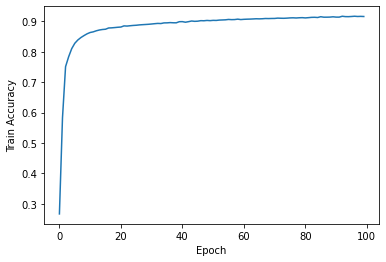

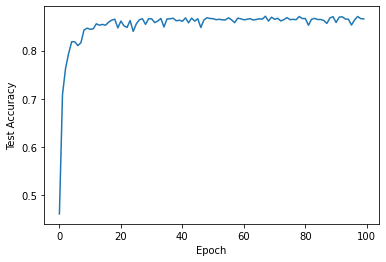

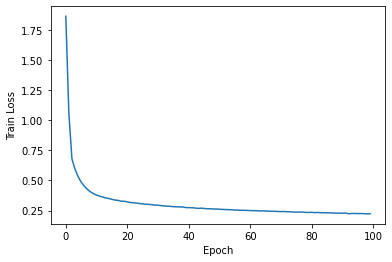

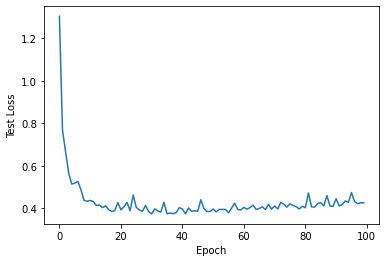

In [44]:
check_log = log
plt.plot(check_log['train_accuracy'])
plt.ylabel('Train Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.plot(check_log['test_accuracy'])
plt.ylabel('Test Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.plot(check_log['train_loss'])
plt.ylabel('Train Loss')
plt.xlabel('Epoch')
plt.show()
plt.plot(check_log['test_loss'])
plt.ylabel('Test Loss')
plt.xlabel('Epoch')
plt.show()

`Test Loss` makes better sense. As we see our network s doing goodtrain and test until about epoch `75`. But after that our netweok is overfitted which means it is adapted with train and is going to be like train. So this make our test prediction bad so in that position we have to stop traing. This happens because of large size of train data.

### FeedForwardNNMaintained

This is that FeedForwardNN class but I added to attributes which save next to end output and also the predicted anwers.

In [97]:
class FeedForwardNNMaintained:
    
    def __init__(self, input_shape):
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.next_to_last_list = []
        self.labels = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        assert type(self.__output_shape) != None, "Model is not compiled!"
        for i in range(len(self.__layers_list)):
            network_input = self.__layers_list[i].forward(network_input)
            if i == len(self.__layers_list)-2:
                self.next_to_last_list.append(network_input)
        network_output = network_input
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader):
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        batch_res = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(batch_res, y_batch)
        batch_losses = self.__loss(y_batch, batch_res)
        batch_average_loss = np.mean(batch_losses)
        self.__update_weights(batch_res, y_batch)
        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch):
        batch_res = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(batch_res, y_batch)
        batch_losses = self.__loss(y_batch, batch_res)
        batch_average_loss = np.mean(batch_losses)
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        labels = []
        for i in range(outputs.shape[0]):
            labels.append([])
            is_set = False
            max_prob = 0
            index = 0
            for j in range(outputs.shape[1]):
                labels[i].append(0)
                if is_set:
                    if max_prob < outputs[i,j]:
                        max_prob = outputs[i,j]
                        index = j
                else:
                    max_prob = outputs[i,j]
                    index = j
                    is_set = True
            labels[i][index] = 1
        labels = np.array(labels)
        labels = np.asmatrix(labels)
        return labels
    
    
    def __compute_accuracy(self, output, expected_output):
        output = self.__get_labels(output)
        self.labels.append(output)
        true_prediction = 0
        all_prediction = 0
        for i in range(output.shape[0]):
            all_prediction += 1
            if np.array(output)[i].tolist() == np.array(expected_output)[i].tolist():
                true_prediction += 1
        accuracy = true_prediction / all_prediction
        return accuracy
    
    
    def __update_weights(self, output, y_train):
        derivation_of_layer = self.__loss.derivative(y_train, output)
        for layer in reversed(self.__layers_list):
            derivation_of_layer = layer.update_weights(derivation_of_layer, self.__lr)
        return

Here we make a notwork that decode input in two dimension that we will use it to show classes and then it predict the class. For this first we just train the network then we use train and test and save the result. After that we make list for each class and plot scatter of values with different colors.

In [108]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 30
TRAINLOADER = Dataloader(np.array(trainData), np.array(trainLabels), 10, batch_size=32, shuffle=True)
TESTLOADER = Dataloader(np.array(testData), np.array(testLabels), 10, batch_size=32, shuffle=True)

network = FeedForwardNNMaintained(INPUT_SHAPE)
network.add_layer(20, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(2, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=LeakyRelu(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, None, print_results = True)

network.labels.clear()
network.next_to_last_list.clear()

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results = True)

Epoch 1:
	Train: Average Accuracy: 0.21496666666666667	Average Loss: 2.016229731478361
Epoch 2:
	Train: Average Accuracy: 0.38375	Average Loss: 1.479774080200048
Epoch 3:
	Train: Average Accuracy: 0.51425	Average Loss: 1.1810815143152997
Epoch 4:
	Train: Average Accuracy: 0.6379333333333334	Average Loss: 0.9682745489673467
Epoch 5:
	Train: Average Accuracy: 0.68655	Average Loss: 0.8204152859649037
Epoch 6:
	Train: Average Accuracy: 0.7133166666666667	Average Loss: 0.7511049762658522
Epoch 7:
	Train: Average Accuracy: 0.74025	Average Loss: 0.7082313161234509
Epoch 8:
	Train: Average Accuracy: 0.79425	Average Loss: 0.6586880071546312
Epoch 9:
	Train: Average Accuracy: 0.8092166666666667	Average Loss: 0.613647980321731
Epoch 10:
	Train: Average Accuracy: 0.8159833333333333	Average Loss: 0.5797096764570213
Epoch 11:
	Train: Average Accuracy: 0.82225	Average Loss: 0.5571202417440382
Epoch 12:
	Train: Average Accuracy: 0.8277166666666667	Average Loss: 0.5361756997532553
Epoch 13:
	Train: Ave

In [151]:
def getLabel(one_hot):
    for i in range(one_hot.shape[1]):
        if one_hot[0,i] == 1:
            return str(i)
            
labels_points_x = {'0':[], '1':[], '2':[], '3':[], '4':[], '5':[], '6':[], '7':[], '8':[], '9':[]}
labels_points_y = {'0':[], '1':[], '2':[], '3':[], '4':[], '5':[], '6':[], '7':[], '8':[], '9':[]}

for i in range(len(network.next_to_last_list)):
    for j in range(len(network.next_to_last_list[i])):
        label = getLabel(network.labels[i][j])
        labels_points_x[label].append(network.next_to_last_list[i][j][0,0])
        labels_points_y[label].append(network.next_to_last_list[i][j][0,1])

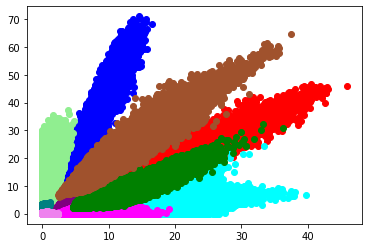

In [159]:
plt.scatter(labels_points_x['0'],labels_points_y['0'],color='red')
plt.scatter(labels_points_x['1'],labels_points_y['1'],color='blue')
plt.scatter(labels_points_x['2'],labels_points_y['2'],color='cyan')
plt.scatter(labels_points_x['3'],labels_points_y['3'],color='purple')
plt.scatter(labels_points_x['4'],labels_points_y['4'],color='magenta')
plt.scatter(labels_points_x['5'],labels_points_y['5'],color='lightgreen')
plt.scatter(labels_points_x['6'],labels_points_y['6'],color='green')
plt.scatter(labels_points_x['7'],labels_points_y['7'],color='teal')
plt.scatter(labels_points_x['8'],labels_points_y['8'],color='sienna')
plt.scatter(labels_points_x['9'],labels_points_y['9'],color='violet')
plt.show()

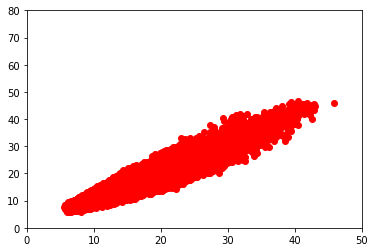

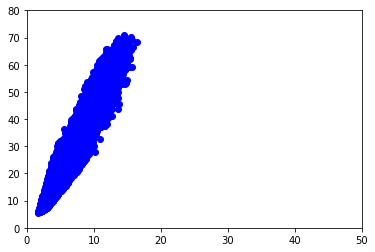

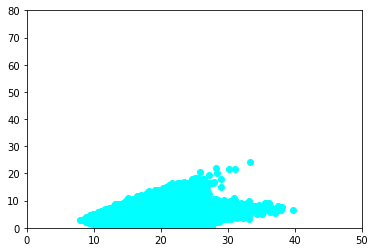

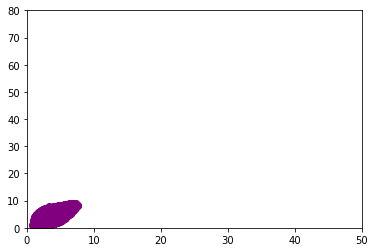

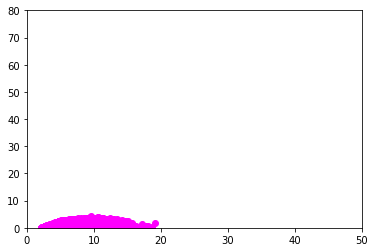

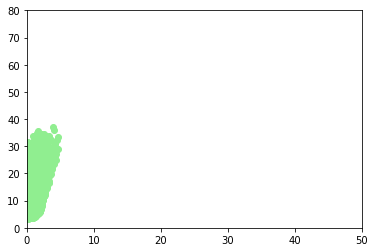

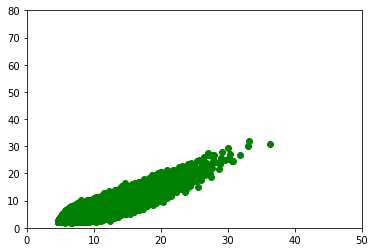

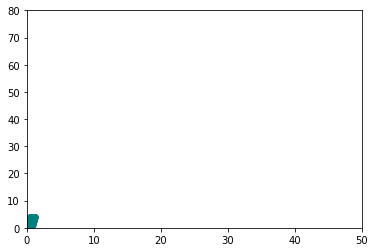

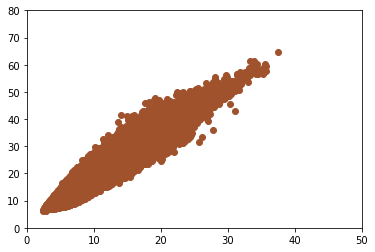

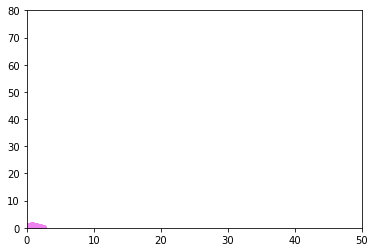

In [164]:
plt.scatter(labels_points_x['0'],labels_points_y['0'],color='red')
plt.xlim(0, 50)
plt.ylim(0, 80)
plt.show()
plt.scatter(labels_points_x['1'],labels_points_y['1'],color='blue')
plt.xlim(0, 50)
plt.ylim(0, 80)
plt.show()
plt.scatter(labels_points_x['2'],labels_points_y['2'],color='cyan')
plt.xlim(0, 50)
plt.ylim(0, 80)
plt.show()
plt.scatter(labels_points_x['3'],labels_points_y['3'],color='purple')
plt.xlim(0, 50)
plt.ylim(0, 80)
plt.show()
plt.scatter(labels_points_x['4'],labels_points_y['4'],color='magenta')
plt.xlim(0, 50)
plt.ylim(0, 80)
plt.show()
plt.scatter(labels_points_x['5'],labels_points_y['5'],color='lightgreen')
plt.xlim(0, 50)
plt.ylim(0, 80)
plt.show()
plt.scatter(labels_points_x['6'],labels_points_y['6'],color='green')
plt.xlim(0, 50)
plt.ylim(0, 80)
plt.show()
plt.scatter(labels_points_x['7'],labels_points_y['7'],color='teal')
plt.xlim(0, 50)
plt.ylim(0, 80)
plt.show()
plt.scatter(labels_points_x['8'],labels_points_y['8'],color='sienna')
plt.xlim(0, 50)
plt.ylim(0, 80)
plt.show()
plt.scatter(labels_points_x['9'],labels_points_y['9'],color='violet')
plt.xlim(0, 50)
plt.ylim(0, 80)
plt.show()

As we can see in the scatter plots, we can see network is generally good and made good classificaion and can detect classes for `MNIST` dataset good.

But also we see some conflicts that make hard for our network and shows network has problem in thos parts. Class `0` nd class `8` have realy near classification that shows we have problem in that. Also there is small conflict between class `0` and class `6`. In other hand we have problem for classes `9`, `7`, and `4`.